## Analyze load testing

In [1]:
from pyaaas.models.dataset import Dataset
from pyaaas.aaas import AaaS
from pyaaas.models.attribute_type import AttributeType
import pandas as pd
from scripts.data_size_stress_test import dummy_data_analyze_stress_test
import timeit
import requests

### 2. Run tests

In [3]:
s  = requests.Session()
s.verify = False
con = AaaS("https://arxaas.nais.preprod.local", client=s)
batches = range(1, 30, 2)


In [7]:
result_dict = {}
for result in dummy_data_analyze_stress_test(batches, con):
    result_dict.update(result)

/home/H153869/PycharmProjects/ARXaaS-load-testing/venv/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/H153869/PycharmProjects/ARXaaS-load-testing/venv/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/H153869/PycharmProjects/ARXaaS-load-testing/venv/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestW

SystemError: {"timestamp":"2019-04-11T11:25:09.471+0000","message":"Handler dispatch failed; nested exception is java.lang.OutOfMemoryError: Java heap space","details":"uri=/api/analyze"}

In [8]:
result_dict

{'5000': 0.2812898359989049,
 '15000': 0.208144780001021,
 '25000': 0.4281265860008716,
 '35000': 0.8580165729999862,
 '45000': 0.7331721070004278,
 '55000': 0.8399013369999011,
 '65000': 1.4235688410008152,
 '75000': 2.649165394999727,
 '85000': 1.9647504309996293,
 '95000': 3.0053768589987158,
 '105000': 2.9913863689998834,
 '115000': 4.365695967000647}

### 3. Generate rapport

In [9]:
result_df = pd.DataFrame.from_dict(result_dict, orient="index", columns=["time"])

In [11]:
result_df.head()

,time
5000,0.281290
15000,0.208145
25000,0.428127
35000,0.858017
45000,0.733172


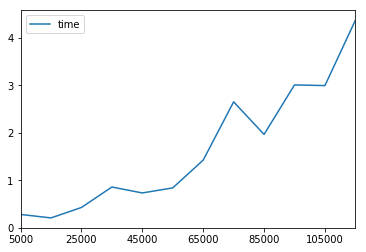

In [13]:
result_df.plot();